In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To read data, we use read_csv from pandas. we store it in a variable called df (which means dataframe)

In [2]:
df=pd.read_csv("../input/titanic/train.csv")

head() helps us to display the first 5 observations.

We can specify the argument as head(10) to get first 10 observations

In the same way, tail() helps us to display the last 5 observations.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


df.shape gives us the shape of the dataset.

It returns a tuple. the first number is the number of rows and the second one is the number of columns in that data

In [5]:
df.shape

(891, 12)

This tells us there are 891 rows and 12 columns

We can see that, there's and index given by the dataframe and also passenger ID that starts with 1. so we will probably make the passenger ID the first column

In [6]:
df=df.set_index("PassengerId")

We see that PassengerId has become the index columns of the dataframe.

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We first start by understanding our data.

- what are the columns in the dataset
- how many values are present and if column has null values
- we get the descriptive statistics( mean, median, std deviation) of the numerical column of the dataset
- what are the datatypes of the column present in the dataset
- are there any duplicate values in the columns

info() gives us the information about the

- number of columns
- names of columns
- datatype of the columns
- non-null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We see that there are 10 columns. THere are actually 11 columns in total including the PassengerId column we set as index.

We have 2 float (float64) variables, 4 integer(int64) variables and 5 Strings (object)

We are somewhat able to see that **Age** has a few missing values.

We can also see that **cabin** has a LOT of missing values like, 687 null values. 
(We can drop this column OR we can try to figure out the cabins for othe passenger by checking if there is any relation with Fare)

There are also 2 null values in the **embarked** column.

We can get the list of columns in our dataframe by using df.columns

In [9]:
list(df.columns)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

isna() or isnull() for a datframe woulf return the entire dataframe with TRUE FALSE values. TRUE would mean value is NULL and FALSE would mean it is not.

In [10]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


We can try to find the null value counts in each of the column using df.isnua().sum()

In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [12]:
grp1=df.groupby("Sex")

group.first prints all the first entries of the groups.

In [13]:
grp1.first()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


to access/find the values contained by one of the group, we use teh get_group function.


In [14]:
grp1.get_group("female")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


df.value_counts would give the count of the values present in a particular column

In [15]:
df.value_counts("Sex")

Sex
male      577
female    314
dtype: int64

to see what the Embarkes column has, we can try this

In [16]:
df.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
dtype: int64

We can use groupby function for more than one column. Lets say, Sex and Survived

In [17]:
grp2=df.groupby(['Sex','Survived'])

In [18]:
grp2.first()

Pclass                                               Name  \
Sex    Survived                                                              
female 0              3               Vestrom, Miss. Hulda Amanda Adolfina   
       1              1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
male   0              3                            Braund, Mr. Owen Harris   
       1              2                       Williams, Mr. Charles Eugene   

                  Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
Sex    Survived                                                         
female 0         14.0      0      0     350406   7.8542   C49        S  
       1         38.0      1      0   PC 17599  71.2833   C85        C  
male   0         22.0      1      0  A/5 21171   7.2500   E46        S  
       1         34.0      0      0     244373  13.0000   D56        S

We saw that the Age column has 177 null values. So let stry to fill them.

But the problem is, when we want to replace the null values with mean, we might get mean arount 29. We cannot replace 29 for a child. 

So we will here use groupby functions 

In [19]:
df['Age'].mean()

29.69911764705882

What we are trying to do here is basically we are trying to have different age groups. Say, child(0-18),adult(18-45), oldage(45+)

We can do this in two ways.

1. We can try to create new column and specify the value for it using conditions. We create 3 dataframe for chils, adult adn oldage and concatenate them
2. We can use bins for this purpose. Using bins makes it very easy

**Method 1**

In [20]:

df_c=df[(df["Age"]>0) & (df['Age']<18)]
df_c["Desc"]="child"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df_c.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Desc
PassengerId,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child


In [22]:

df_a=df[(df["Age"]>=18) & (df['Age']<=45)]
df_a["Desc"]="adult"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_a.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Desc
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [24]:

df_o=df[(df["Age"]>45)]
df_o["Desc"]="oldage"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
df_o.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Desc
PassengerId,,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,oldage
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,oldage
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,oldage
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,oldage
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,oldage


In [26]:
df_new=pd.concat([df_c,df_a,df_o],axis=0)

In [27]:
df_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Desc
PassengerId,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,child
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,child


**Method 2**

when you try to apply bins for columns haveing null values, then the new column also will have null value for the corresponding row

In [28]:
df_new1=df
df_new1['desc']=pd.cut(df['Age'],bins=[0,18,45,100],labels=['child','adult','oldage'])

In [29]:
df_new1.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,desc
PassengerId,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,adult
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,adult
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,adult
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,adult


lets use df_new itself

we can now have 6 groups and based on this, we can fill the values for "Age" for male child, female child, male adult, female adult and so on...

In [30]:
grp3=df_new.groupby('Desc')

In [31]:
grp3.first()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Desc,,,,,,,,,,,
adult,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
child,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
oldage,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [32]:
grp4=df_new.groupby(['Desc','Sex'])

In [33]:
grp4.first()

Survived  Pclass  \
Desc   Sex                        
adult  female         1       1   
       male           0       3   
child  female         1       2   
       male           0       3   
oldage female         1       1   
       male           0       1   

                                                            Name   Age  SibSp  \
Desc   Sex                                                                      
adult  female  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1   
       male                              Braund, Mr. Owen Harris  22.0      1   
child  female                Nasser, Mrs. Nicholas (Adele Achem)  14.0      1   
       male                       Palsson, Master. Gosta Leonard   2.0      3   
oldage female                           Bonnell, Miss. Elizabeth  58.0      0   
       male                              McCarthy, Mr. Timothy J  54.0      0   

               Parch     Ticket     Fare Cabin Embarked  
Desc   Sex                                               
adult  female      0   PC 17599  71.2833   C85        C  
       male        0  A/5 21171   7.2500   D56        S  
child  female      0     237736  30.0708    G6        C  
       male        1     349909  21.0750    F4        S  
oldage female      0     113783  26.5500  C103        S  
       male        0      17463  51.8625   E46        S

In [34]:
grp4['Age'].mean()

Desc    Sex   
adult   female    29.454545
        male      29.079193
child   female     9.236364
        male       8.856379
oldage  female    53.133333
        male      55.369863
Name: Age, dtype: float64

We can replace the corresponding values of age 

We will here use TRANSFORM function.
here we give a lambda function as argument

In [35]:
df_new['Age']=grp4['Age'].transform(lambda x: x.fillna(x.mean()))

Now the null values are filled.

In [36]:
df_new.iloc[12:25]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Desc
PassengerId,,,,,,,,,,,,
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,child
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S,child
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.00,5,2,CA 2144,46.9000,NaN,S,child
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,child
85,1,2,"Ilett, Miss. Bertha",female,17.00,0,0,SO/C 14885,10.5000,NaN,S,child
87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S,child
112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,child
115,0,3,"Attalah, Miss. Malake",female,17.00,0,0,2627,14.4583,NaN,C,child
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S,child


To check if it has outliers. We use boxplot,
In this case, Fare can actually have outliers.

<AxesSubplot:>

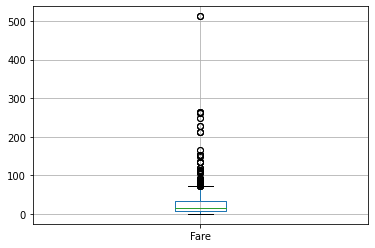

In [37]:
df_new.boxplot(column='Fare')

 we try to get rid out outliers but avoiding the rows having those large or small values. 
We will use 1st quartile, 3rd quartile, compute the inter quartile range and then compute lower and upper values.

Lower= Q1 -1.5* IQR

Upper= Q3 + 1.5* IQR


In [38]:
def IQR(data,col):
    
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    
    iqr=q3-q1
    lower= q1- 1.5*iqr
    upper= q3+ 1.5*iqr
    return (lower,upper)



In [39]:
lower,upper=IQR(df_new,"Fare")
print("lower : ",lower,"\nupper : ",upper)

lower :  -29.937499999999996 
upper :  71.3625


In [40]:
df_new3=df_new[(df_new['Fare']>lower) & (df_new['Fare']<upper)]

In [41]:
df_new.shape

(714, 12)

In [42]:
df_new3.shape

(620, 12)

By comparing the shape, we see that, 94 rows are not there. I dont think we have any more null values in Fare or Age. LETS CHECK

In [43]:
df_new3.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       515
Embarked      0
Desc          0
dtype: int64

cabin has 515 null vales for 620 rows so we can just drop it.

In [44]:
df_new3=df_new3.drop(['Cabin'],axis=1)

In [45]:
df_new3.sort_index()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Desc
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,adult
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,adult
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,adult


In [46]:
df_new3.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Desc
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,child
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,child
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,child
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,child


In [47]:
df_new3.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Desc        0
dtype: int64

SUCCESSSFULLYYYY NO NULLL VALUES!!!!

<AxesSubplot:>

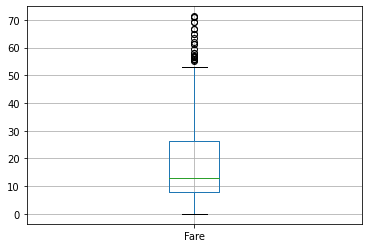

In [48]:
df_new3.boxplot(column="Fare")

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

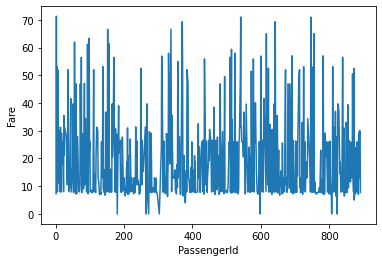

In [49]:
sns.lineplot(data=df_new3['Fare'])

<AxesSubplot:xlabel='count', ylabel='Desc'>

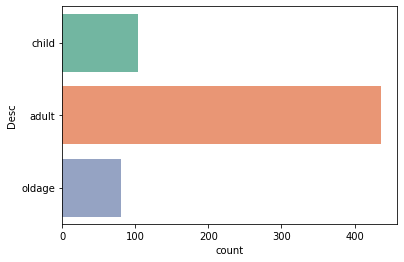

In [50]:
sns.countplot(y='Desc',data=df_new3,palette='Set2')

In [51]:
df_new3.value_counts("Desc")

Desc
adult     436
child     104
oldage     80
dtype: int64

<AxesSubplot:xlabel='count', ylabel='SibSp'>

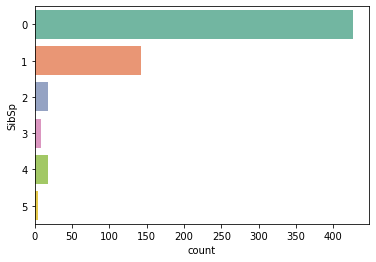

In [52]:
sns.countplot(y='SibSp',data=df_new3,palette='Set2')

<AxesSubplot:xlabel='count', ylabel='Parch'>

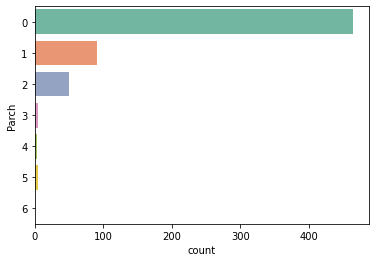

In [53]:
sns.countplot(y='Parch',data=df_new3,palette='Set2')

400+ of them travelled without family

In [54]:
df_new3.value_counts("Parch")

Parch
0    465
1     91
2     50
3      5
5      5
4      3
6      1
dtype: int64